Notebook Titanic - EDA
================

**Author:** Sr. Menezes



## Titanic



# Imports



In [100]:
import pandas as pd

-   Responsible 4 read the data



In [101]:
import numpy as np

-   Responsible 4 do math with nD-arrays



In [102]:
import seaborn as sns

-   Responsible 4 showing pretty graphs



In [103]:
import matplotlib.pyplot as plt

-   Responsible 4 showing graphs



In [104]:
from sklearn.preprocessing import OrdinalEncoder

-   Responsible 4 transform categorical features into numerical representations. (categorical features as an integer array)



In [105]:
from sklearn.impute import SimpleImputer

-   Class designed to handling missing values in datasets. (Primary function is to replace NaN or other specified missing value placeholders with imputed values based on chosen strategy)



In [106]:
from sklearn.compose import make_column_transformer

-   Is a convenience function that simplifies the creation of ColumnTransformer objects.



In [107]:
from sklearn.pipeline import Pipeline, make_pipeline

- Pipeline:
    -   Is a tool that allows me to chain together multiple data transformations and a final estimator(like a classifier or regressor) into a single, cohesive object, it streamline the machine learning workflow by ensuring that all steps, from pre-processing to model training, are applied consistently and efficiently.
- make_pipeline:
    -  Function that simplifies the creation of Pipeline object

In [108]:
from sklearn.linear_model import LogisticRegression

-   Implements the Logistic Regression. A classification algorithhm used for predcting the probability of a categorical outcome.



In [109]:
from sklearn.svm import SVC

-   SVC(Suport Vector Classifier) is a type of Support Vector Machine (SVM) used for classification tasks



In [110]:
from sklearn.ensemble import RandomForestClassifier

-   Sklearn implements of a Random Forest Classifier, whichh is a ensamble learn method. An ensemble learning is a ML technique that comines multiple individual models to create a more powerful and accurate predctive model



In [111]:
from sklearn.tree import DecisionTreeClassifier

-  Decision tree for classication



In [112]:
from sklearn.naive_bayes import GaussianNB

-   GaussianNB is like Naive Bayes but for numbers, not categorical



In [113]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV

- cross_val_score:
    - it is the cross validation score
- stratifiedKFold:
    - provides train/test indices to split data in train and test sets
- train_test_split:
    - is a method for spliting the data
- GridSearchCV:
    - is a powerful tool in scikit-learn used for hyper-parameter tuning on ML models.

## Data path

In [114]:
DATA_PATH2 = "/mnt/hdmenezess42/GitProjects/Titanic/data/"

# Exploratory Data Analysis

In [115]:
train_df = pd.read_csv(f"{DATA_PATH2}/train.csv")
test_df = pd.read_csv(f"{DATA_PATH2}/test.csv")

## Train dataFrmae info

### Train head (First 10 datas from train DataFrame)

In [116]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### More train info about the data columns

In [117]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [118]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Categorical description
- Information for the categorical data

In [119]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,G6,S
freq,1,577,7,4,644


## Looking into Surivors rate for different dataColumns

### Looking into Pclass survivors rate

In [120]:
train_df.groupby(['Pclass'], as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


### Looking into Sex survivors rate

In [121]:
train_df.groupby(['Sex'], as_index=False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


### Looking into the survival rate of the number of siblings/spouses aboard 

In [122]:
train_df.groupby(['SibSp'], as_index=False)['Survived'].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


### Looking into the survival rate of the number of parents / children aboard

In [123]:
train_df.groupby(['Parch'], as_index=False)['Survived'].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


### Looking into the size of families aboard

In [124]:
train_df['Family_Size'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['Family_Size'] = test_df['SibSp'] + test_df['Parch'] + 1

In [125]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


### Looking into surviving rate for families

In [126]:
train_df.groupby(['Family_Size'], as_index=False)['Survived'].mean()

,Family_Size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


- We can observe that families with fewer members have a higher survival rate, and the more the number of family members increases, the lower the chances of survival for that family.

### grouping by family size

In [127]:
family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}

In [128]:
train_df['Family_Size_Grouped'] = train_df['Family_Size'].map(family_map)
test_df['Family_Size_Grouped'] = test_df['Family_Size'].map(family_map)

### Looking into survival rate for family size

In [129]:
train_df.groupby(['Family_Size_Grouped'], as_index=False)['Survived'].mean()

,Family_Size_Grouped,Survived
0,Alone,0.303538
1,Large,0.160000
2,Medium,0.162162
3,Small,0.578767


### Looking into survival rate for embarkation ports
- C=Cherbourg
- Q=Queenstown
- S=Southampton

In [130]:
train_df.groupby(['Embarked'],as_index=False)['Survived'].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


- We can observe that Cherbourg port have the bigger number of survivors

## Plotting information to analyze the data more deeply

### Plot of survival rate for age groups

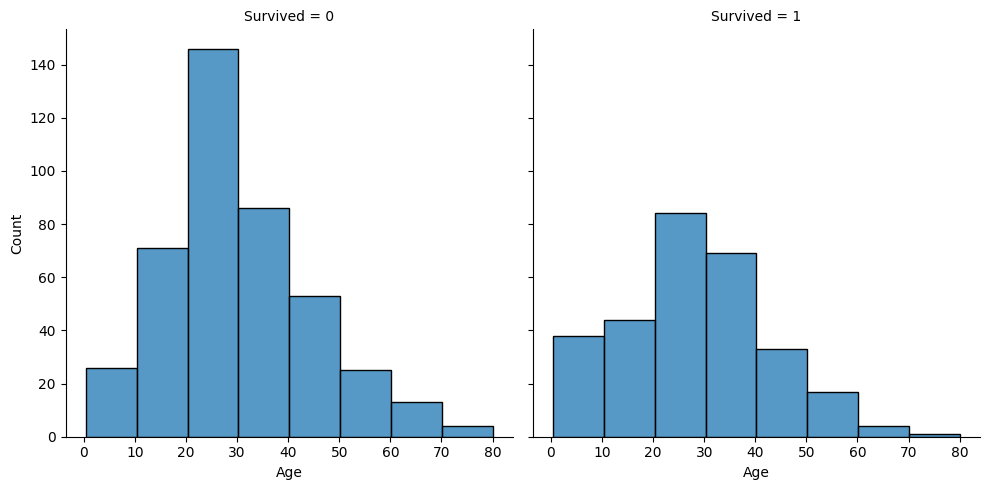

In [131]:
sns.displot(train_df, x='Age', col="Survived", binwidth=10, height=5)

#### Cuting up the diferent ages (Cue cut)

In [132]:
train_df['Age_Cut'] = pd.qcut(train_df['Age'], 8) # Take ages and fill out  8 different buckets
test_df['Age_Cut']  = pd.qcut(test_df['Age'], 8)

### Survival rates age_cut

In [133]:
train_df.groupby(['Age_Cut'], as_index=False)['Survived'].mean()

/tmp/nix-shell.z84HCy/ipykernel_3262/1587675067.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Age_Cut'], as_index=False)['Survived'].mean()


,Age_Cut,Survived
0,"(0.419, 16.0]",0.550000
1,"(16.0, 20.125]",0.341772
2,"(20.125, 24.0]",0.367347
3,"(24.0, 28.0]",0.352941
4,"(28.0, 32.312]",0.416667
5,"(32.312, 38.0]",0.450549
6,"(38.0, 47.0]",0.329545
7,"(47.0, 80.0]",0.415730


### Working the age for better fit the model

In [134]:
# Train
train_df.loc[train_df['Age']<=16, 'Age'] = 0
train_df.loc[(train_df['Age']>16) & (train_df['Age']<=20.125), 'Age'] = 1
train_df.loc[(train_df['Age']>20.125) & (train_df['Age']<=24), 'Age'] = 2
train_df.loc[(train_df['Age']>24) & (train_df['Age']<=28), 'Age'] = 3
train_df.loc[(train_df['Age']>28) & (train_df['Age']<=32.312), 'Age'] = 4
train_df.loc[(train_df['Age']>32.312) & (train_df['Age']<=38), 'Age'] = 5
train_df.loc[(train_df['Age']>38) & (train_df['Age']<=47), 'Age'] = 6
train_df.loc[(train_df['Age']>47) & (train_df['Age']<=80), 'Age'] = 7
train_df.loc[train_df['Age']>80, 'Age']

# Test
test_df.loc[test_df['Age']<=16, 'Age'] = 0
test_df.loc[(test_df['Age']>16) & (test_df['Age']<=20.125), 'Age'] = 1
test_df.loc[(test_df['Age']>20.125) & (test_df['Age']<=24), 'Age'] = 2
test_df.loc[(test_df['Age']>24) & (test_df['Age']<=28), 'Age'] = 3
test_df.loc[(test_df['Age']>28) & (test_df['Age']<=32.312), 'Age'] = 4
test_df.loc[(test_df['Age']>32.312) & (test_df['Age']<=38), 'Age'] = 5
test_df.loc[(test_df['Age']>38) & (test_df['Age']<=47), 'Age'] = 6
test_df.loc[(test_df['Age']>47) & (test_df['Age']<=80), 'Age'] = 7
test_df.loc[test_df['Age']>80, 'Age']

Series([], Name: Age, dtype: float64)

- Checking the dataFrame after this changes

In [135]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,"(20.125, 24.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,71.2833,C85,C,2,Small,"(32.312, 38.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,"(24.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,53.1000,C123,S,2,Small,"(32.312, 38.0]"
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,8.0500,NaN,S,1,Alone,"(32.312, 38.0]"


### Looking into survival rates per fare

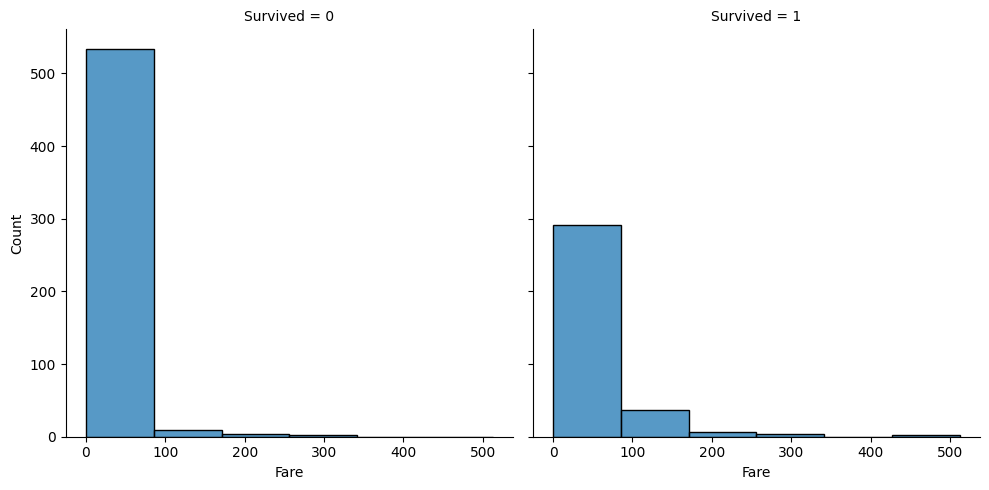

In [136]:
sns.displot(train_df, x='Fare', col='Survived', binwidth=80, height=5)

#### Fare rate qcut

In [137]:
train_df['Fare_Cut'] = pd.qcut(train_df['Fare'], 6)
test_df['Fare_Cut'] = pd.qcut(test_df['Fare'], 6)

In [138]:
train_df.groupby(['Fare_Cut'], as_index=False)['Survived'].mean()

/tmp/nix-shell.z84HCy/ipykernel_3262/1994933730.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Fare_Cut'], as_index=False)['Survived'].mean()


,Fare_Cut,Survived
0,"(-0.001, 7.775]",0.205128
1,"(7.775, 8.662]",0.190789
2,"(8.662, 14.454]",0.366906
3,"(14.454, 26.0]",0.436242
4,"(26.0, 52.369]",0.417808
5,"(52.369, 512.329]",0.697987


#### Working the Fare to better fit the model

In [139]:
# Train
train_df.loc[train_df['Fare']<=7.775, 'Fare'] = 0
train_df.loc[(train_df['Fare']>7.775) & (train_df['Fare']<=8.662), 'Fare'] = 1
train_df.loc[(train_df['Fare']>8.662) & (train_df['Fare']<=14.454), 'Fare'] = 2
train_df.loc[(train_df['Fare']>14.454) & (train_df['Fare']<=26.0), 'Fare'] = 3
train_df.loc[(train_df['Fare']>26.0) & (train_df['Fare']<=52.369), 'Fare'] = 4
train_df.loc[(train_df['Fare']>52.369) & (train_df['Fare']<= 512.329), 'Fare'] = 5
train_df.loc[train_df['Fare']>512.329, 'Fare'] = 6
# test
test_df.loc[test_df['Fare']<=7.775, 'Fare'] = 0
test_df.loc[(test_df['Fare']>7.775) & (test_df['Fare']<=8.662), 'Fare'] = 1
test_df.loc[(test_df['Fare']>8.662) & (test_df['Fare']<=14.454), 'Fare'] = 2
test_df.loc[(test_df['Fare']>14.454) & (test_df['Fare']<=26.0), 'Fare'] = 3
test_df.loc[(test_df['Fare']>26.0) & (test_df['Fare']<=52.369), 'Fare'] = 4
test_df.loc[(test_df['Fare']>52.369) & (test_df['Fare']<= 512.329), 'Fare'] = 5
test_df.loc[test_df['Fare']>512.329, 'Fare'] = 6

### Find a person's title

In [140]:
train_df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [141]:
# Train
train_df['Title'] = train_df['Name'].str.split(pat=',', expand=True)[1].str.split(pat='.', expand=True)[0].apply(lambda x:x.strip())
# splits each string in the 'Name' column at thhe first comma into two parts
# then selects the second part (index 1)
# then redo this for extracting the tile
# and after that, we make a lambda function to remove leading/trailing whitespace from the extracted title
# Ensures values like ' Mr' or 'Mrs ' become clean strings like 'Mr' and 'Mrs'.

# test
test_df['Title'] = test_df['Name'].str.split(pat=',', expand=True)[1].str.split(pat='.', expand=True)[0].apply(lambda x:x.strip())
# splits each string in the 'Name' column at thhe first comma into two parts
# then selects the second part (index 1)
# then redo this for extracting the tile
# and after that, we make a lambda function to remove leading/trailing whitespace from the extracted title
# Ensures values like ' Mr' or 'Mrs ' become clean strings like 'Mr' and 'Mrs'.

#### A little summary of the titles:
- military:
    - Capt
    - Col
    - Major
- Noble:
    - Jonkheer
    - The Countless
    - Don
    - Lady
    - Sir
- Ummaried Female:
    - Mile
    - Ms
    - Mme

#### Fixing the tiles to fit the summary above

In [142]:
# Train
train_df['Title'] = train_df['Title'].replace({
    'Capt': 'Military',
    'Col': 'Military',
    'Major': 'Military',
    'Jonkheer': 'Noble',
    'the Countess': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Mile': 'Noble',
    'Ms': 'Noble',
    'Mme': 'Noble'
})

# test
test_df['Title'] = test_df['Title'].replace({
    'Capt': 'Military',
    'Col': 'Military',
    'Major': 'Military',
    'Jonkheer': 'Noble',
    'the Countess': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Mile': 'Noble',
    'Ms': 'Noble',
    'Mme': 'Noble'
})

#### Survival rate base on the persons Title

In [143]:
train_df.groupby(['Title'], as_index=False)['Survived'].agg(['count', 'mean'])

,Title,count,mean
0,Dr,7,0.428571
1,Master,40,0.575000
2,Military,5,0.400000
3,Miss,182,0.697802
4,Mlle,2,1.000000
5,Mr,517,0.156673
6,Mrs,125,0.792000
7,Noble,7,0.714286
8,Rev,6,0.000000


### Count the name length

In [144]:
train_df['Name_length'] = train_df['Name'].apply(lambda x: len(x))
test_df['Name_length'] = test_df['Name'].apply(lambda x: len(x))

#### KdePlot of Name_length
- Kernel density estimate (KDE) plto is a method for visualizing the distribution of observations in a dataset, analogous to a historgram.

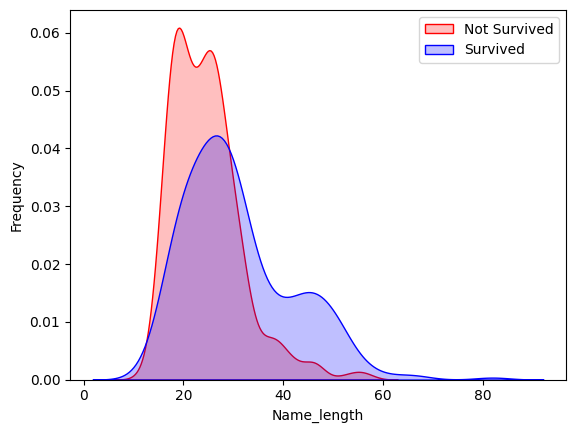

In [145]:
g = sns.kdeplot(train_df['Name_length'][(train_df['Survived']==0) & (train_df['Name_length'].notnull())], color="Red", fill=True)
g = sns.kdeplot(train_df['Name_length'][(train_df['Survived']==1) & (train_df['Name_length'].notnull())], color="Blue", fill=True)
g.set_xlabel('Name_length')
g.set_ylabel('Frequency')
g = g.legend(['Not Survived', 'Survived'])

- Odd stuff for 21st century,but we can observed that, more longer the name, more people survived

#### Name Length Goupedby

In [146]:
train_df['Name_lengthGB'] = pd.qcut(train_df['Name_length'], 8)
test_df['Name_lengthGB'] = pd.qcut(test_df['Name_length'], 8)

In [147]:
train_df.groupby(['Name_lengthGB'], as_index=False)['Survived'].mean()

/tmp/nix-shell.z84HCy/ipykernel_3262/2517454713.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Name_lengthGB'], as_index=False)['Survived'].mean()


,Name_lengthGB,Survived
0,"(11.999, 18.0]",0.214286
1,"(18.0, 20.0]",0.252427
2,"(20.0, 23.0]",0.307692
3,"(23.0, 25.0]",0.346939
4,"(25.0, 27.25]",0.292929
5,"(27.25, 30.0]",0.428571
6,"(30.0, 38.0]",0.517241
7,"(38.0, 82.0]",0.745283


#### Name Length GB - working the data for better fit the model

In [148]:
# Train
train_df.loc[train_df['Name_length']<=18, 'Name_Size'] = 0
train_df.loc[(train_df['Name_length']>18) & (train_df['Name_length']<=20), 'Name_Size'] = 1
train_df.loc[(train_df['Name_length']>20) & (train_df['Name_length']<=23), 'Name_Size'] = 2
train_df.loc[(train_df['Name_length']>23) & (train_df['Name_length']<=25), 'Name_Size'] = 3
train_df.loc[(train_df['Name_length']>25) & (train_df['Name_length']<=27.25), 'Name_Size'] = 4
train_df.loc[(train_df['Name_length']>27.25) & (train_df['Name_length']<=30), 'Name_Size'] = 5
train_df.loc[(train_df['Name_length']>30) & (train_df['Name_length']<=38), 'Name_Size'] = 6
train_df.loc[(train_df['Name_length']>38) & (train_df['Name_length']<=82), 'Name_Size'] = 7
train_df.loc[train_df['Name_length']>82, 'Name_Size']

# test
test_df.loc[test_df['Name_length']<=18, 'Name_Size'] = 0
test_df.loc[(test_df['Name_length']>18) & (test_df['Name_length']<=20), 'Name_Size'] = 1
test_df.loc[(test_df['Name_length']>20) & (test_df['Name_length']<=23), 'Name_Size'] = 2
test_df.loc[(test_df['Name_length']>23) & (test_df['Name_length']<=25), 'Name_Size'] = 3
test_df.loc[(test_df['Name_length']>25) & (test_df['Name_length']<=27.25), 'Name_Size'] = 4
test_df.loc[(test_df['Name_length']>27.25) & (test_df['Name_length']<=30), 'Name_Size'] = 5
test_df.loc[(test_df['Name_length']>30) & (test_df['Name_length']<=38), 'Name_Size'] = 6
test_df.loc[(test_df['Name_length']>38) & (test_df['Name_length']<=82), 'Name_Size'] = 7
test_df.loc[test_df['Name_length']>82, 'Name_Size']

Series([], Name: Name_Size, dtype: float64)

In [149]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut,Fare_Cut,Title,Name_length,Name_lengthGB,Name_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,NaN,S,2,Small,"(20.125, 24.0]","(-0.001, 7.775]",Mr,23,"(20.0, 23.0]",2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,C85,C,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,51,"(38.0, 82.0]",7.0
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,NaN,S,1,Alone,"(24.0, 28.0]","(7.775, 8.662]",Miss,22,"(20.0, 23.0]",2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,C123,S,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,44,"(38.0, 82.0]",7.0
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,NaN,S,1,Alone,"(32.312, 38.0]","(7.775, 8.662]",Mr,24,"(23.0, 25.0]",3.0


### Looking into Tickets

In [150]:
train_df['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

- We can see that the tickets are a little dirty, we have tickets that have a space in the middle, others have a dot, and so on.

#### Cleaning the tickets
- Waking backwards to get the ticket number

In [153]:
train_df['TicketNumber'] = train_df['Ticket'].apply(lambda x: pd.Series({'Ticket': x.split()[-1]}))
# Splits each ticket string by whitespace and keeps only the last part (usually the numeric ticket)
# Wraps the result in a named series so it can be treated like a small DataFrame with column 'Ticket'

test_df['TicketNumber'] = test_df['Ticket'].apply(lambda x: pd.Series({'Ticket': x.split()[-1]}))
# Splits each ticket string by whitespace and keeps only the last part (usually the numeric ticket)
# Wraps the result in a named series so it can be treated like a small DataFrame with column 'Ticket'

#### Gouping by the tickets numbers

In [156]:
train_df.groupby(['TicketNumber'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending=False)

,TicketNumber,count,mean
94,1601,7,0.714286
196,2343,7,0.000000
464,347082,7,0.000000
468,347088,6,0.000000
358,3101295,6,0.000000
...,...,...,...
276,2667,1,1.000000
278,2669,1,0.000000
279,26707,1,0.000000
280,2671,1,0.000000


#### Creating a Count column for the tickets number
- Objective:
    - A group of people may be associated with the same ticket number, this allow us to extract some relevant informations like:
    -Survival group behavior.
    - Feature Enrichment:
        - The new column can be used as feature to a ML model

In [161]:
train_df.groupby('TicketNumber')['TicketNumber'].transform('count')

0      1
1      1
2      1
3      2
4      1
      ..
886    1
887    1
888    2
889    1
890    1
Name: TicketNumber, Length: 891, dtype: int64

In [162]:
train_df['TicketNumberCounts'] = train_df.groupby('TicketNumber')['TicketNumber'].transform('count')
test_df['TicketNumberCounts'] = test_df.groupby('TicketNumber')['TicketNumber'].transform('count')

In [163]:
train_df.groupby(['TicketNumberCounts'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending=False)

,TicketNumberCounts,count,mean
0,1,544,0.295956
1,2,188,0.569149
2,3,66,0.712121
3,4,44,0.500000
6,7,21,0.238095
5,6,18,0.000000
4,5,10,0.000000


#### Looking in the first part of the tickets string

In [164]:
train_df['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [165]:
train_df['Ticket'].str.split(pat=' ', expand=True)

,0,1,2
0,A/5,21171,None
1,PC,17599,None
2,STON/O2.,3101282,None
3,113803,None,None
4,373450,None,None
...,...,...,...
886,211536,None,None
887,112053,None,None
888,W./C.,6607,None
889,111369,None,None


In [170]:
train_df['TicketLocation'] = np.where(train_df['Ticket'].str.split(pat=' ', expand=True)[1].notna(), train_df['Ticket'].str.split(pat=' ', expand=True)[0].apply(lambda x: x.strip()), 'Blank') # First part(first filter) Looking if has 'None' in the second column, if has than the first column does not have the information we want. The second filter extracts the prefix and remove whhitespace
test_df['TicketLocation'] = np.where(test_df['Ticket'].str.split(pat=' ', expand=True)[1].notna(), test_df['Ticket'].str.split(pat=' ', expand=True)[0].apply(lambda x: x.strip()), 'Blank') # First part(first filter) Looking if has 'None' in the second column, if has than the first column does not have the information we want. The second filter extracts the prefix and remove whhitespace


In [171]:
train_df['TicketLocation'].value_counts()

TicketLocation
Blank         665
PC             60
C.A.           27
STON/O         12
A/5            10
W./C.           9
CA.             8
SOTON/O.Q.      8
A/5.            7
SOTON/OQ        7
STON/O2.        6
CA              6
C               5
S.O.C.          5
SC/PARIS        5
F.C.C.          5
SC/Paris        4
A/4.            3
PP              3
A/4             3
S.O./P.P.       3
SC/AH           3
A./5.           2
P/PP            2
A.5.            2
WE/P            2
SOTON/O2        2
S.C./PARIS      2
S.C./A.4.       1
Fa              1
S.O.P.          1
SO/C            1
S.P.            1
A4.             1
W.E.P.          1
A/S             1
SC              1
SW/PP           1
SCO/W           1
W/C             1
S.W./PP         1
F.C.            1
C.A./SOTON      1
Name: count, dtype: int64

##### Now we clean this data (like removing duplicats and other stuff)

In [173]:
# Train
train_df['TicketLocation'] = train_df['TicketLocation'].replace({
    'SOTON/O.Q':'SOTON/OQ',
    'C.A': 'CA',
    'SC/PARIS': 'SC/Paris',
    'S.C./PARIS': 'SC/Paris',
    'A/4.': 'A/4',
    'A/5.': 'A/5',
    'A.5.': 'A/5',
    'A./5.': 'A/5',
    'W./C.': 'W/C',
})

# Test
test_df['TicketLocation'] = test_df['TicketLocation'].replace({
    'SOTON/O.Q':'SOTON/OQ',
    'C.A': 'CA',
    'SC/PARIS': 'SC/Paris',
    'S.C./PARIS': 'SC/Paris',
    'A/4.': 'A/4',
    'A/5.': 'A/5',
    'A.5.': 'A/5',
    'A./5.': 'A/5',
    'W./C.': 'W/C',
})

> Note: This below is an exploration and we can see that there is not much useful information for the model, so this will not be included in the final model.

In [174]:
train_df.groupby(['TicketLocation'], as_index=False)['Survived'].agg(['count', 'mean'])

,TicketLocation,count,mean
0,A/4,6,0.000000
1,A/5,21,0.095238
2,A/S,1,0.000000
3,A4.,1,0.000000
4,Blank,665,0.383459
5,C,5,0.400000
6,C.A.,27,0.481481
7,C.A./SOTON,1,0.000000
8,CA,6,0.000000
9,CA.,8,0.125000


### Looking into the Cabin column

In [182]:
train_df['Cabin'] = train_df['Cabin'].fillna('U') # 'U' as unassigned
train_df['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in train_df['Cabin']])

In [183]:
train_df.groupby(['Cabin'], as_index=False)['Survived'].agg(['count', 'mean'])

,Cabin,count,mean
0,A,15,0.466667
1,B,47,0.744681
2,C,59,0.593220
3,D,33,0.757576
4,E,32,0.750000
5,F,13,0.615385
6,G,4,0.500000
7,T,1,0.000000
8,U,687,0.299854


#### Conveted Cabin into binary. 1=Cabin 0=No cabin

In [184]:
train_df['Cabin_Assigned'] = train_df['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)
test_df['Cabin_Assigned'] = test_df['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)

In [185]:
train_df.groupby(['Cabin_Assigned'], as_index=False)['Survived'].agg(['count', 'mean'])

,Cabin_Assigned,count,mean
0,0,687,0.299854
1,1,204,0.666667


### Looking into the final dataFrame and Saving

In [186]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_Cut,Fare_Cut,Title,Name_length,Name_lengthGB,Name_Size,TicketNumber,TicketNumberCounts,TicketLocation,Cabin_Assigned
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,...,"(20.125, 24.0]","(-0.001, 7.775]",Mr,23,"(20.0, 23.0]",2.0,21171,1,A/5,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,...,"(32.312, 38.0]","(52.369, 512.329]",Mrs,51,"(38.0, 82.0]",7.0,17599,1,PC,1
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,...,"(24.0, 28.0]","(7.775, 8.662]",Miss,22,"(20.0, 23.0]",2.0,3101282,1,STON/O2.,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,...,"(32.312, 38.0]","(52.369, 512.329]",Mrs,44,"(38.0, 82.0]",7.0,113803,2,Blank,1
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,...,"(32.312, 38.0]","(7.775, 8.662]",Mr,24,"(23.0, 25.0]",3.0,373450,1,Blank,0


In [189]:
train_df.shape

(891, 24)

In [190]:
test_df.shape

(418, 23)

#### Saving dataFrames after EDA

In [191]:
train_df.to_csv(f'{DATA_PATH2}/train_afterEDA.csv')
test_df.to_csv(f'{DATA_PATH2}/test_afterEDA.csv')